In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [7]:
df.shape

(500, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe

<bound method NDFrame.describe of      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]>

In [10]:
df.drop('Gender', axis=1, inplace=True)  #temporarily remove 1st col i.e gender , will use that col later but not now

In [11]:
df.describe

<bound method NDFrame.describe of      Height  Weight  Index
0       174      96      4
1       189      87      2
2       185     110      4
3       195     104      3
4       149      61      3
..      ...     ...    ...
495     150     153      5
496     184     121      4
497     141     136      5
498     150      95      5
499     173     131      5

[500 rows x 3 columns]>

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


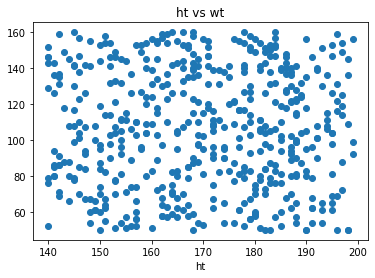

In [16]:
plt.scatter(df.Height,df.Weight)
plt.title('ht vs wt')
plt.xlabel('wt')
plt.xlabel('ht')
df.corr() #getting a correlation

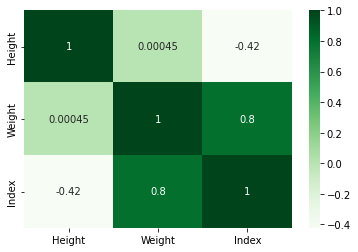

In [18]:
sns.heatmap(df.corr(),annot=True, cmap='Greens') # negative val means inv protional

In [23]:
model = LinearRegression()
df.ndim

2

In [24]:
df.Height.ndim  # 1-D data (height) we r giving as inp , produces 1-D op

1

In [25]:
df.Height

0      174
1      189
2      185
3      195
4      149
      ... 
495    150
496    184
497    141
498    150
499    173
Name: Height, Length: 500, dtype: int64

In [30]:
#training phase , dataset train
#model.fit(x,y)  x=features in 2d form(df.Height)  ,  y = df.Weight
#to convert 1d data to 2d form :
df.Height.values.reshape(-1,1).ndim
df.Height.values.reshape(500,1) #or (-1,1)

array([[174],
       [189],
       [185],
       [195],
       [149],
       [189],
       [147],
       [154],
       [174],
       [169],
       [195],
       [159],
       [192],
       [155],
       [191],
       [153],
       [157],
       [140],
       [144],
       [172],
       [157],
       [153],
       [169],
       [185],
       [172],
       [151],
       [190],
       [187],
       [163],
       [179],
       [153],
       [178],
       [195],
       [160],
       [157],
       [189],
       [197],
       [144],
       [171],
       [185],
       [175],
       [149],
       [157],
       [161],
       [182],
       [185],
       [188],
       [181],
       [161],
       [140],
       [168],
       [176],
       [163],
       [172],
       [196],
       [187],
       [172],
       [178],
       [164],
       [143],
       [191],
       [141],
       [193],
       [190],
       [175],
       [179],
       [172],
       [168],
       [164],
       [194],
       [153],
      

In [31]:
model.fit(df.Height.values.reshape(-1,1),df.Weight)

LinearRegression()

In [32]:
#testing part , test with same dtset\
pred=model.predict(df.Height.values.reshape(-1,1))  # this is pred values


In [37]:
newdf = pd.DataFrame({"input" : df.Height , "actual" : df.Weight , "predicted" : pred})
newdf

,input,actual,predicted
0,174,96,106.003577
1,189,87,106.016805
2,185,110,106.013277
3,195,104,106.022096
4,149,61,105.981530
...,...,...,...
495,150,153,105.982412
496,184,121,106.012396
497,141,136,105.974475
498,150,95,105.982412


,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


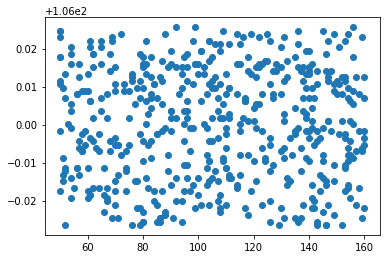

In [39]:
#find relation by sctrplot
plt.scatter(newdf['actual'] , newdf['predicted'])
df.corr()

In [40]:
newdf[{'actual','predicted'}].corr()

,actual,predicted
actual,1.000000,0.000446
predicted,0.000446,1.000000


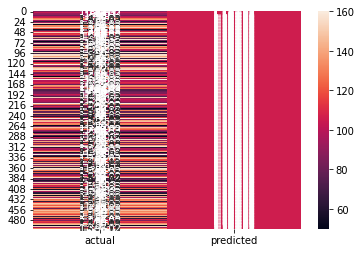

In [41]:
sns.heatmap(newdf[{'actual','predicted'}] , annot=True , )

In [48]:
model.intercept_  # is a 'c' value in y=mx+c
 


105.85013133000962

In [49]:
model.coef_   # is a 'm' value

array([0.00088187])

In [44]:
model.predict([[74]])  # inp in 2d form

array([105.91538978])

In [50]:
#VERIFY:
#y=mx+c
x=74
m=0.00088187
c=105.85013133000962
y=(m*x)+c
print(y)

105.91538971000962


In [51]:
r2_score(newdf['actual'] , newdf['predicted'])   #performance of a regression-based machine learning model

1.9886705748817235e-07

In [53]:
model.predict([[174]])

array([106.00357687])